In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path_stop='/content/drive/MyDrive/csvFiles/stopwords.txt'

In [ ]:

stopwords_file = path_stop
stopwords_list = []

with open(stopwords_file, 'r', encoding='utf-8') as file:
    words = file.read().split()

    for word in words:
        word = word.strip()
        if word and not word.isnumeric():
            stopwords_list.append(word)

In [ ]:
stopwords_list2 = [word.lower() for word in stopwords_list]



In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.ml.feature import CountVectorizer, IDF
from pyspark.ml.classification import NaiveBayes


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=4fb87fcd788ecda999ccb6b4cb7beba3a1965fbecd8c5981ef9b104229a07a40
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
spark = SparkSession.builder \
    .appName("Sentiment Analysis") \
    .getOrCreate()


In [ ]:
data_path='/content/drive/MyDrive/csvFiles/codal_with_label.csv'

In [ ]:
data_path3='/content/drive/MyDrive/csvFiles/codal3_with_row_number.csv'


In [ ]:
data_path4='/content/drive/MyDrive/csvFiles/codal4_with_row_number.csv'

In [ ]:
import pandas as pd

In [ ]:

pdf3 = pd.read_excel(data_path3)

# Print the DataFrame
pdf3.head()


In [ ]:
pdf4 = pd.read_excel(data_path4)

# Print the DataFrame
pdf4.head()

In [ ]:
pdf5 = pd.concat([pdf3, pdf4])


In [ ]:
pdf6=pdf5[['article','label']]
pdf6

In [ ]:
import pandas as pd

pdf = pd.read_excel(data_path)

# Print the DataFrame
pdf.head()


In [ ]:
pdf2=pdf[['article','label']]

In [ ]:
pdf7=pd.concat([pdf2, pdf6])
pdf7

In [ ]:
dfcn=pdf7

In [ ]:
df = spark.createDataFrame(pdf7)

# Show the PySpark DataFrame
df.show()

In [ ]:
pdf2 = df.toPandas()
pdf2

,article,label
0,به گزارش کدال نگر بورس24 ،شرکت کارخانجات ایران...,1
1,به گزارش کدال نگر بورس24 ، شرکت البرز دارو در ...,0
2,به گزارش کدال نگر بورس24 ، شرکت دارویی برکت در...,1
3,به گزارش کدال نگر بورس24 ،شرکت داروسازی تولید ...,0
4,به گزارش کدال نگر بورس24 ،شرکت گروه دارویی الب...,0
...,...,...
11697,به گزارش کدال نگر بورس24 ، شرکت صنایع لاستیکی ...,0
11698,به گزارش کدال نگر بورس24 ، شرکت حمل ونقل بین ا...,0
11699,به گزارش کدال نگر بورس24 ، شرکت تولید و صادرات...,0
11700,به گزارش کدال نگر بورس24 ، شرکت داروسازی تولید...,0


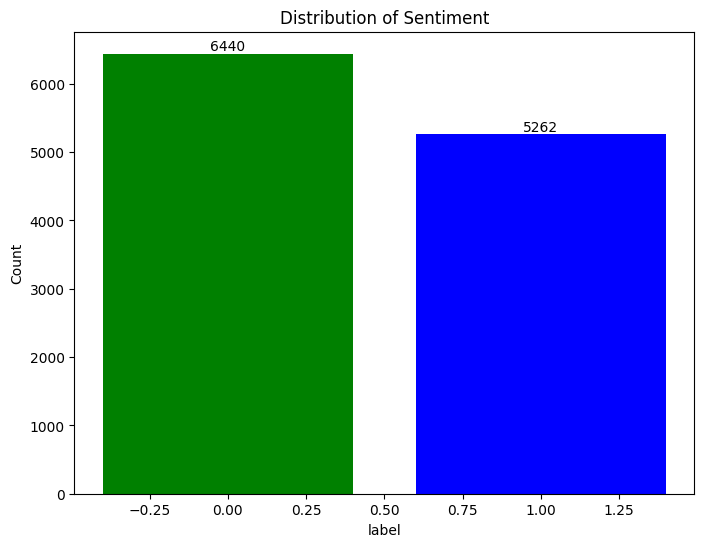

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts = pdf2['label'].value_counts()

colors = ['green', 'blue']
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)

for x, y in zip(sentiment_counts.index, sentiment_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')

plt.show()

In [ ]:
tokenizer = Tokenizer(inputCol="article", outputCol="tokens")
df = tokenizer.transform(df)

remover = StopWordsRemover(inputCol="tokens", outputCol="filtered_tokens",stopWords=stopwords_list2)
df = remover.transform(df)

vectorizer = CountVectorizer(inputCol="filtered_tokens", outputCol="raw_features")
vec_model = vectorizer.fit(df)
df = vec_model.transform(df)

idf = IDF(inputCol="raw_features", outputCol="features")
idfModel = idf.fit(df)
df = idfModel.transform(df)


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

(training_data, validation_data) = df.randomSplit([0.8, 0.2], seed=42)

nb = NaiveBayes(featuresCol="features", labelCol="label")
nv_model = nb.fit(training_data)

nv_predictions = nv_model.transform(validation_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(nv_predictions)
print("Accuracy:", accuracy)

In [ ]:
import pandas as pd

In [ ]:
validation_data_df = validation_data.toPandas()
validation_data_df

In [ ]:
predictions_df = predictions.toPandas()
predictions_df

,article,label,tokens,filtered_tokens,raw_features,features,rawPrediction,probability,prediction
0,بورس24 : بر اساس اطلاعیه بورس تهران، بانک تجا...,1,"[, بورس24, :, بر, اساس, اطلاعیه, بورس, تهران،,...","[, بورس24, اساس, اطلاعیه, بورس, تهران،, بانک, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.005741478559674, 0.0, 0.0, 0.0, 0...","[-922.804325656772, -895.074910489638]","[9.062917080409823e-13, 0.9999999999990936]",1.0
1,بورس24 : بر اساس اطلاعیه شرکت بورس تهران صندو...,0,"[, بورس24, :, بر, اساس, اطلاعیه, شرکت, بورس, ت...","[, بورس24, اساس, اطلاعیه, بورس, تهران, صندوق, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.005741478559674, 0.0, 0.0, 0.0, 0...","[-1852.3342060744094, -1816.8498174642634]","[3.884416881719485e-16, 0.9999999999999996]",1.0
2,بورس24 : بر اساس اطلاعیه شرکت بورس تهران، بان...,1,"[, بورس24, :, بر, اساس, اطلاعیه, شرکت, بورس, ت...","[, بورس24, اساس, اطلاعیه, بورس, تهران،, بانک, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.005741478559674, 0.0, 0.0, 0.0, 0...","[-820.2536342334552, -809.3949493436935]","[1.923644066644216e-05, 0.9999807635593336]",1.0
3,بورس24 : بر اساس اطلاعیه شرکت فرابورس ایران، ...,1,"[, بورس24, :, بر, اساس, اطلاعیه, شرکت, فرابورس...","[, بورس24, اساس, اطلاعیه, فرابورس, ایران،, سها...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.005741478559674, 0.0, 0.0, 0.0, 0...","[-728.7381393673417, -721.6964537084112]","[0.0008738866099698526, 0.9991261133900301]",1.0
4,بورس24 : بر اساس اطلاعیه شرکت فرابورس ایران، ...,0,"[, بورس24, :, بر, اساس, اطلاعیه, شرکت, فرابورس...","[, بورس24, اساس, اطلاعیه, فرابورس, ایران، , تا...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.005741478559674, 0.0, 0.0, 0.0, 0...","[-669.6833247699124, -659.5803256779543]","[4.095486105380148e-05, 0.9999590451389462]",1.0
...,...,...,...,...,...,...,...,...,...
2263,به گزارش کدال نگر بوسر 24، شرکت پتروشیمی خراسا...,1,"[به, گزارش, کدال, نگر, بوسر, 24،, شرکت, پتروشی...","[گزارش, کدال, نگر, بوسر, 24،, پتروشیمی, خراسان...","(1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.015500181160751672, 0.015673762136712614, 0...","[-961.9492425796869, -934.018529566777]","[7.410465041768379e-13, 0.999999999999259]",1.0
2264,به گزارش کدال نگر بورس24 ، شرکت کارخانجات تول...,0,"[به, گزارش , کدال, نگر, بورس24, ،, شرکت, کارخا...","[گزارش , کدال, نگر, بورس24, کارخانجات, تولیدی,...","(0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 6.0, 1.0, ...","(0.0, 0.015673762136712614, 0.005741478559674,...","[-4296.038008548566, -4567.853559726242]","[1.0, 8.953771933751295e-119]",0.0
2265,به گزارش کدال نگر بورس24 ، گروه سرمایه گذاری...,1,"[به, گزارش , کدال, نگر, بورس24, ،, گروه , سرما...","[گزارش , کدال, نگر, بورس24, گروه , سرمایه, میر...","(0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.015673762136712614, 0.005741478559674,...","[-7948.562415934133, -7837.133200209711]","[4.044887881334298e-49, 1.0]",1.0
2266,به گزاش کدال نگر بورس24 ، شرکت سیمان لارستان ...,0,"[به, گزاش, کدال, نگر, بورس24, ،, شرکت , سیمان,...","[گزاش, کدال, نگر, بورس24, شرکت , سیمان, لارستا...","(0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.015673762136712614, 0.005741478559674,...","[-281.64472592200866, -266.2269238609274]","[2.0143436059184088e-07, 0.9999997985656394]",1.0


In [ ]:
correct_predictions = nv_predictions.filter(nv_predictions.label == nv_predictions.prediction).count()

total_predictions = nv_predictions.count()

accuracy2 = correct_predictions / total_predictions

print("Accuracy:", accuracy2)


Accuracy: 0.7178130511463845


In [ ]:
from pyspark.sql.functions import col


In [ ]:
nv_TP = nv_predictions.filter((col("label") == 1) & (col("prediction") == 1)).count()
nv_FP = nv_predictions.filter((col("label") == 0) & (col("prediction") == 1)).count()


nv_FN = nv_predictions.filter((col("label") == 1) & (col("prediction") == 0)).count()

nv_TN = nv_predictions.filter((col("label") == 0) & (col("prediction") == 0)).count()

nv_accuracy = (nv_TP + nv_TN) / (nv_TP + nv_TN + nv_FP + nv_FN)


print("Accuracy:", nv_accuracy)

Accuracy: 0.7178130511463845


In [ ]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lr = LogisticRegression(featuresCol="features", labelCol="label")
lr_model = lr.fit(training_data)

lr_predictions = lr_model.transform(validation_data)

lr_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
lr_accuracy = lr_evaluator.evaluate(lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

rf = RandomForestClassifier(featuresCol="features", labelCol="label")
rf_model = rf.fit(training_data)

rf_predictions = rf_model.transform(validation_data)

rf_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
rf_accuracy = rf_evaluator.evaluate(rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

svm = LinearSVC(featuresCol="features", labelCol="label")
svm_model = svm.fit(training_data)

svm_predictions = svm_model.transform(validation_data)

svm_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
svm_accuracy = svm_evaluator.evaluate(svm_predictions)
print("SVM Accuracy:", svm_accuracy)



Logistic Regression Accuracy: 0.701058201058201
Random Forest Accuracy: 0.6635802469135802
SVM Accuracy: 0.7438271604938271


In [ ]:
rf_TP = rf_predictions.filter((col("label") == 1) & (col("prediction") == 1)).count()
rf_FP = rf_predictions.filter((col("label") == 0) & (col("prediction") == 1)).count()


rf_FN = rf_predictions.filter((col("label") == 1) & (col("prediction") == 0)).count()

rf_TN = rf_predictions.filter((col("label") == 0) & (col("prediction") == 0)).count()

rf_accuracy = (rf_TP + rf_TN) / (rf_TP + rf_TN + rf_FP + rf_FN)


print("Accuracy:", rf_accuracy)

Accuracy: 0.6635802469135802


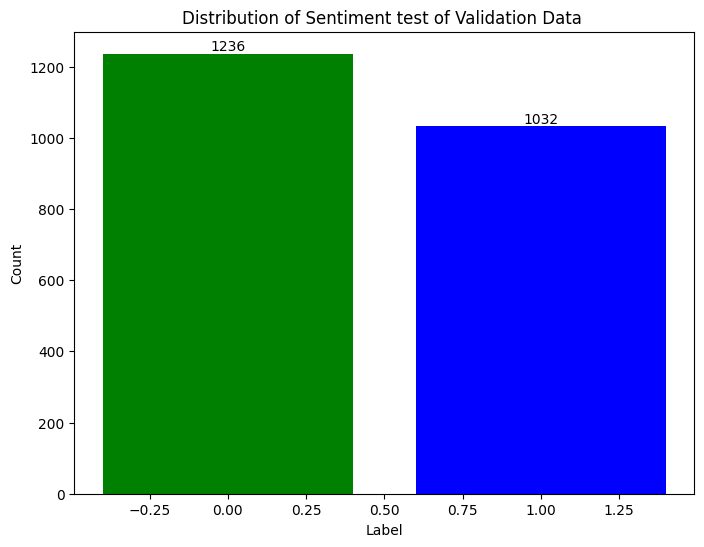

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

validation_data_pd =validation_data.toPandas()

vd_sentiment_counts = validation_data_pd['label'].value_counts()

]colors = ['green', 'blue']

plt.figure(figsize=(8, 6))
plt.bar(vd_sentiment_counts.index, vd_sentiment_counts.values, color=colors)

for x, y in zip(vd_sentiment_counts.index, vd_sentiment_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment test of Validation Data ')

plt.show()



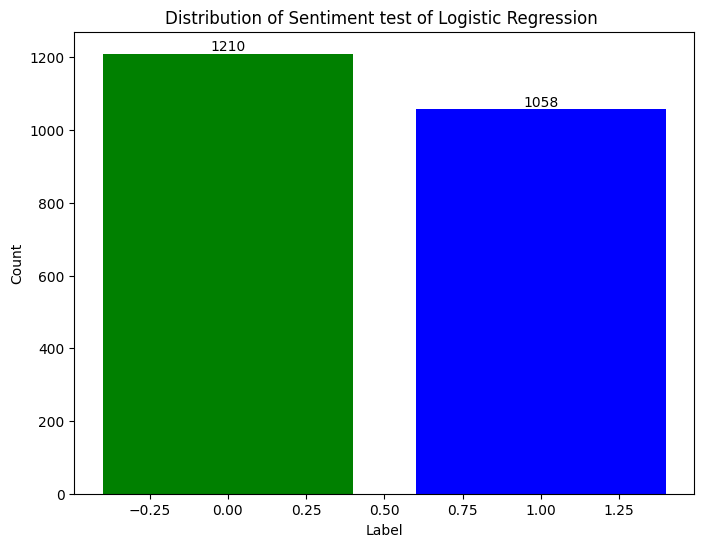

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

lr_predictions_pd = lr_predictions.toPandas()

lr_sentiment_counts = lr_predictions_pd['prediction'].value_counts()

colors = ['green', 'blue']

plt.figure(figsize=(8, 6))
plt.bar(lr_sentiment_counts.index, lr_sentiment_counts.values, color=colors)

for x, y in zip(lr_sentiment_counts.index, lr_sentiment_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment test of Logistic Regression ')

plt.show()


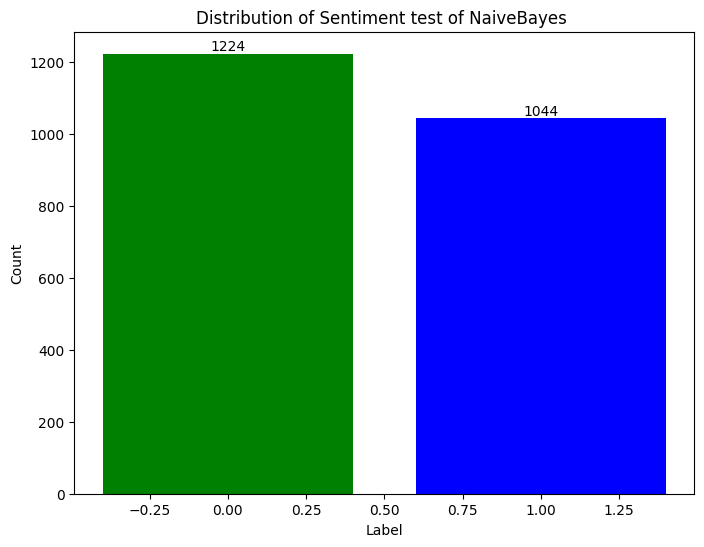

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

nv_predictions_pd = nv_predictions.toPandas()

nv_sentiment_counts = nv_predictions_pd['prediction'].value_counts()

colors = ['green', 'blue']

plt.figure(figsize=(8, 6))
plt.bar(nv_sentiment_counts.index, nv_sentiment_counts.values, color=colors)

for x, y in zip(nv_sentiment_counts.index, nv_sentiment_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment test of NaiveBayes ')

plt.show()


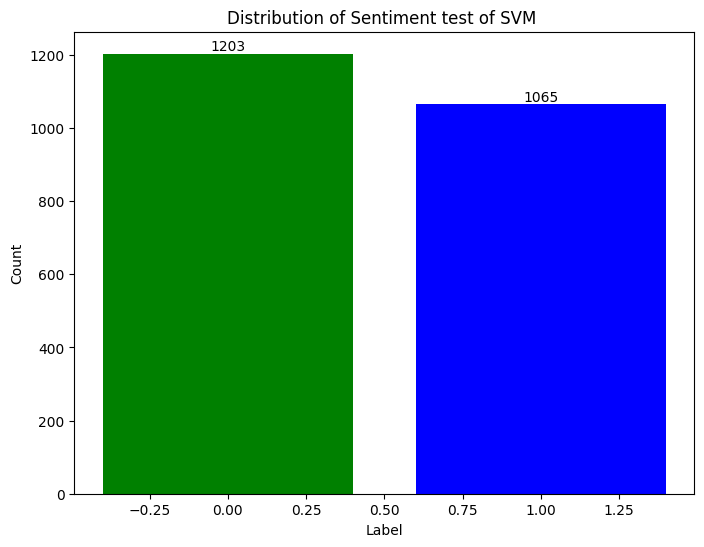

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

svm_predictions_pd = svm_predictions.toPandas()

svm_sentiment_counts = svm_predictions_pd['prediction'].value_counts()

colors = ['green', 'blue']

plt.figure(figsize=(8, 6))
plt.bar(svm_sentiment_counts.index, svm_sentiment_counts.values, color=colors)

for x, y in zip(svm_sentiment_counts.index, svm_sentiment_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment test of SVM ')

plt.show()


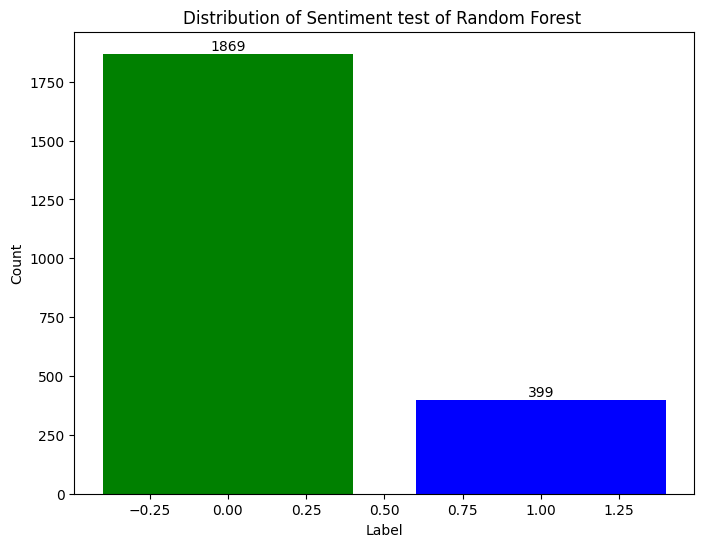

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

rf_predictions_pd = rf_predictions.toPandas()

rf_sentiment_counts = rf_predictions_pd['prediction'].value_counts()

colors = ['green', 'blue']

plt.figure(figsize=(8, 6))
plt.bar(rf_sentiment_counts.index, rf_sentiment_counts.values, color=colors)

for x, y in zip(rf_sentiment_counts.index, rf_sentiment_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment test of Random Forest ')

plt.show()


In [ ]:
rf_sentiment_counts = rf_predictions_pd['prediction'].value_counts()


In [ ]:
rf_sentiment_counts

0.0    1869
1.0     399
Name: prediction, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts = pdf2['label'].value_counts()

colors = ['green', 'blue']
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)

for x, y in zip(sentiment_counts.index, sentiment_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')

plt.show()

In [ ]:
!pip install tensorflow
!pip install keras


In [ ]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random
import string

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
dfcn['article'] = dfcn['article'].astype(str)


In [ ]:
def process_text(text):
    tokens = word_tokenize(text)
    translator = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stopwords_list]
    return tokens

dfcn['article'] = dfcn['article'].apply(process_text)

In [ ]:
dfcn


,article,label
0,"[گزارش, کدال, نگر, بورس24, ،شرکت, کارخانجات, ا...",1
1,"[گزارش, کدال, نگر, بورس24, البرز, دارو, مزایده...",0
2,"[گزارش, کدال, نگر, بورس24, دارویی, برکت, نتیجه...",1
3,"[گزارش, کدال, نگر, بورس24, ،شرکت, داروسازی, تو...",0
4,"[گزارش, کدال, نگر, بورس24, ،شرکت, گروه, دارویی...",0
...,...,...
8545,"[گزارش, کدال, نگر, بورس24, صنایع, لاستیکی, سهن...",0
8546,"[گزارش, کدال, نگر, بورس24, حمل, ونقل, المللی, ...",0
8547,"[گزارش, کدال, نگر, بورس24, تولید, صادرات, ریشم...",0
8548,"[گزارش, کدال, نگر, بورس24, داروسازی, تولید, دا...",0


In [ ]:
max_length = dfcn['article'].str.len().max()
max_length

276

In [ ]:
from sklearn.model_selection import train_test_split

X = dfcn['article']
y = dfcn['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import concatenate

In [ ]:
tokenizercn = Tokenizer()
tokenizercn.fit_on_texts(X_train)

In [ ]:
tokenizercn


In [ ]:
vocab_len = len(tokenizercn.word_index) + 1

In [ ]:
vocab_len

13257

In [ ]:
encoded = tokenizercn.texts_to_sequences(X_train)

In [ ]:
encoded

[[2, 3, 5, 4, 66, 931, 188, 499, 424, 531, 174, 366, 134, 6128, 54, 13, 1],
 [2,
  3,
  5,
  4,
  28,
  257,
  34,
  8,
  11,
  49,
  10,
  86,
  6129,
  6,
  78,
  460,
  18,
  22,
  15,
  76,
  1,
  10,
  22,
  3602,
  21,
  1],
 [2,
  3,
  5,
  4,
  84,
  361,
  554,
  1409,
  500,
  1042,
  2163,
  4375,
  1,
  1492,
  6130,
  1,
  13,
  244,
  2024,
  3603,
  1135,
  6131,
  136,
  2526,
  2325,
  332,
  2164,
  1136,
  1571,
  932,
  4376,
  3604,
  2025,
  646,
  136,
  1094,
  61,
  332,
  862,
  2326,
  593,
  244,
  1891,
  1572,
  1043,
  142,
  32,
  963,
  271,
  175,
  453,
  1,
  1,
  271,
  175,
  964,
  453,
  1],
 [2, 3, 5, 4, 209, 20, 1218, 61, 8, 11, 71, 44, 89, 6, 7, 12, 9, 17, 1],
 [2,
  3,
  5,
  4,
  111,
  863,
  392,
  40,
  8,
  11,
  63,
  44,
  1219,
  6,
  7,
  12,
  9,
  17,
  1,
  63,
  85,
  1000,
  6,
  7,
  9,
  67,
  82,
  1],
 [2, 3, 5, 4, 489, 537, 65, 24, 54, 13, 1],
 [2, 3, 5, 4, 83, 2026, 65, 40, 8, 2, 1],
 [2, 3, 5, 4, 194, 140, 168, 467, 1044,

In [ ]:
padded = pad_sequences(encoded, maxlen=max_length, padding='post')

In [ ]:
padded.shape

(9361, 276)

In [ ]:
input1 = Input(shape=(max_length,))
embedding1 = Embedding(vocab_len, 100)(input1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPool1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)
dense1 = Dense(10, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(dense1)

In [ ]:
modelcnn = Model(inputs=[input1], outputs=output)

In [ ]:
modelcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
modelcnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 276)]             0         
                                                                 
 embedding (Embedding)       (None, 276, 100)          1325700   
                                                                 
 conv1d (Conv1D)             (None, 273, 32)           12832     
                                                                 
 dropout (Dropout)           (None, 273, 32)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 136, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4352)              0         
                                                             

In [ ]:
encoded_test = tokenizercn.texts_to_sequences(X_test)
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

In [ ]:
padded_test.shape

(2341, 276)

In [ ]:
import numpy as np

In [ ]:
modelcnn.fit([padded], np.array(y_train), epochs=10, batch_size=20, validation_data=([padded_test], np.array(y_test)))

Epoch 1/10
469/469 [==============================] - 14s 27ms/step - loss: 0.4892 - accuracy: 0.7242 - val_loss: 0.3988 - val_accuracy: 0.7856
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 0.3151 - accuracy: 0.8478 - val_loss: 0.4115 - val_accuracy: 0.7847
Epoch 3/10
469/469 [==============================] - 12s 26ms/step - loss: 0.2184 - accuracy: 0.9009 - val_loss: 0.4740 - val_accuracy: 0.7792
Epoch 4/10
469/469 [==============================] - 13s 27ms/step - loss: 0.1631 - accuracy: 0.9276 - val_loss: 0.5385 - val_accuracy: 0.7757
Epoch 5/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1260 - accuracy: 0.9464 - val_loss: 0.6174 - val_accuracy: 0.7796
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1071 - accuracy: 0.9525 - val_loss: 0.6650 - val_accuracy: 0.7719
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0919 - accuracy: 0.9608 - val_loss: 0.7419 - val_accuracy:

In [ ]:
news1='در اطلاعیه‌های منتشر شده امروز در سامانه کدال شرکت‌ قند شیروان قوچان و بجنورد نسبت به احداث واحد مکانیزه بسته بندی شکر شفاف سازی کرده است؛ همچنین در اطلاعیه‌های امروز مشابه هفته گذشته شرکت‌های دارویی از افزایش نرخ محصولات خود خبر دادند.'

In [ ]:
news2='در اطلاعیه‌های منتشر شده امروز در سامانه کدال شرکت مبین و نفت بهران نسبت به تغییرات در صورت‌های مالی خود شفاف سازی کرده‌اند.'

In [ ]:
news3='همچنین در اطلاعیه‌های امروز سامانه کدال شرکت سیم و کابل ابهر با نماد بکابل نیز خبر از افزایش ۴۰ درصدی سود عملیاتی نسبت به سال گذشته داده است.'

In [ ]:

from pyspark.sql.types import StringType, StructType, StructField


schema = StructType([
    StructField("article", StringType(), nullable=False),
])

news_list = [(news1,), (news2,), (news3,)]

test_news_df = spark.createDataFrame(news_list, schema)

test_news_df.show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|article                                                                                                                                                                                                                                     |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|در اطلاعیه‌های منتشر شده امروز در سامانه کدال شرکت‌ قند شیروان قوچان و بجنورد نسبت به احداث واحد مکانیزه بسته بندی شکر شفاف سازی کرده است؛ همچنین در اطلاعیه‌های امروز مشابه هفته گذشته شرکت‌های دارویی از افزایش نرخ محصولات خود خبر دادند.|
|در اطلاعیه‌های منتشر شده امروز در سامانه کد

In [ ]:
newspd = test_news_df.toPandas()
newspd

,article
0,در اطلاعیه‌های منتشر شده امروز در سامانه کدال ...
1,در اطلاعیه‌های منتشر شده امروز در سامانه کدال ...
2,همچنین در اطلاعیه‌های امروز سامانه کدال شرکت س...


In [ ]:

test_news_df = tokenizer.transform(test_news_df)
test_news_df = remover.transform(test_news_df)
test_news_df = vec_model.transform(test_news_df)
test_news_df = idfModel.transform(test_news_df)

# Make predictions on the test data
lr_predictions = lr_model.transform(test_news_df)
rf_predictions = rf_model.transform(test_news_df)
svm_predictions = svm_model.transform(test_news_df)
nv_pr = nv_model.transform(test_news_df)



In [ ]:
lr_sentiments = ["Positive" if label == 1 else "Negative" for label in lr_predictions.select("prediction").collect()]
rf_sentiments = ["Positive" if label == 1 else "Negative" for label in rf_predictions.select("prediction").collect()]
svm_sentiments = ["Positive" if label == 1 else "Negative" for label in svm_predictions.select("prediction").collect()]
nv_sentiments = ["Positive" if label == 1 else "Negative" for label in nv_pr.select("prediction").collect()]

print("Logistic Regression Sentiments:", lr_sentiments)
print("Random Forest Sentiments:", rf_sentiments)
print("SVM Sentiments:", svm_sentiments)
print("NV Sentiments:", nv_sentiments)

Logistic Regression Sentiments: ['Negative', 'Negative', 'Negative']
Random Forest Sentiments: ['Negative', 'Negative', 'Negative']
SVM Sentiments: ['Negative', 'Negative', 'Negative']
NV Sentiments: ['Negative', 'Negative', 'Negative']


In [ ]:

news_encoded_text = tokenizercn.texts_to_sequences(newspd['article'])

news_padded_text = pad_sequences(news_encoded_text, maxlen=max_length, padding='post')
news_cnn_predictions = modelcnn.predict(news_padded_text)
newspd['prediction'] = ['Positive' if p[0] < 0.5 else 'Negative' for p in news_cnn_predictions]


1/1 [==============================] - 0s 377ms/step


In [ ]:
newspd

,article,prediction
0,در اطلاعیه‌های منتشر شده امروز در سامانه کدال ...,Negative
1,در اطلاعیه‌های منتشر شده امروز در سامانه کدال ...,Negative
2,همچنین در اطلاعیه‌های امروز سامانه کدال شرکت س...,Negative


In [ ]:
path_modelcnn='/content/drive/MyDrive/csvFiles/cnnModelBigdata.h5'

In [ ]:
modelcnn.save(path_modelcnn)


NameError: ignored

In [ ]:
svm_model.save('/content/drive/MyDrive/csvFiles/svm_model')
lr_model.save('/content/drive/MyDrive/csvFiles/Logistic_model')
rf_model.save('/content/drive/MyDrive/csvFiles/random_model')
nv_model.save('/content/drive/MyDrive/csvFiles/NaiveBayes_model')


NameError: ignored

In [ ]:
lr_model.save('/content/drive/MyDrive/csvFiles/Logistic_model')


NameError: ignored

In [ ]:
from pyspark.ml.classification import LogisticRegressionModel
from pyspark.ml.classification import NaiveBayesModel
from pyspark.ml.classification import RandomForestClassificationModel
from pyspark.ml.classification import LinearSVCModel




In [ ]:
from tensorflow import keras
loaded_cnn_model = keras.models.load_model(path_modelcnn)


In [ ]:
news_loaded_cnn_predictions = loaded_cnn_model.predict(news_padded_text)
newspd['prediction_loaded_model'] = ['Positive' if p[0] < 0.5 else 'Negative' for p in news_loaded_cnn_predictions]


1/1 [==============================] - 0s 60ms/step


In [ ]:
newspd

,article,prediction,prediction_loaded_model
0,در اطلاعیه‌های منتشر شده امروز در سامانه کدال ...,Negative,Negative
1,در اطلاعیه‌های منتشر شده امروز در سامانه کدال ...,Negative,Negative
2,همچنین در اطلاعیه‌های امروز سامانه کدال شرکت س...,Negative,Negative


In [ ]:

lr_loaded = LogisticRegressionModel.load('/content/drive/MyDrive/csvFiles/Logistic_model')

rf_loaded= RandomForestClassificationModel.load('/content/drive/MyDrive/csvFiles/random_model')

svm_loaded = LinearSVCModel.load('/content/drive/MyDrive/csvFiles/svm_model')
nv_loaded = NaiveBayesModel.load('/content/drive/MyDrive/csvFiles/NaiveBayes_model')

In [ ]:
lr_loaded_predictions = lr_loaded.transform(test_news_df)
rf_loaded_predictions = rf_loaded.transform(test_news_df)
svm_loaded_predictions = svm_loaded.transform(test_news_df)
nv_loaded_predictions= nv_loaded.transform(test_news_df)


NameError: ignored

In [ ]:
lr_loaded_sentiments = ["Positive" if label == 1 else "Negative" for label in lr_loaded_predictions.select("prediction").collect()]
rf_loaded_sentiments = ["Positive" if label == 1 else "Negative" for label in rf_loaded_predictions.select("prediction").collect()]
svm_loaded_sentiments = ["Positive" if label == 1 else "Negative" for label in svm_loaded_predictions.select("prediction").collect()]
nv_loaded_sentiments = ["Positive" if label == 1 else "Negative" for label in nv_loaded_predictions.select("prediction").collect()]

print("Logistic Regression Sentiments_loaded:", lr_loaded_sentiments)
print("Random Forest Sentiments_loaded:", rf_loaded_sentiments)
print("SVM Sentiments_loaded:", svm_loaded_sentiments)
print("NV Sentiments_loaded:", svm_loaded_sentiments)

Logistic Regression Sentiments_loaded: ['Negative', 'Negative', 'Negative']
Random Forest Sentiments_loaded: ['Negative', 'Negative', 'Negative']
SVM Sentiments_loaded: ['Negative', 'Negative', 'Negative']
NV Sentiments_loaded: ['Negative', 'Negative', 'Negative']


In [ ]:
lr_loaded_predictions_val = lr_loaded.transform(validation_data)
rf_loaded_predictions_val = rf_loaded.transform(validation_data)
svm_loaded_predictions_val = svm_loaded.transform(validation_data)
nv_loaded_predictions_val= nv_loaded.transform(validation_data)


In [ ]:
svm_loaded_predictions_val_pd = svm_loaded_predictions_val.toPandas()

In [ ]:
lr_loaded_predictions_val_pd

,article,label,tokens,filtered_tokens,raw_features,features,rawPrediction,probability,prediction
0,بورس24 : بر اساس اطلاعیه بورس تهران، بانک تجا...,1,"[, بورس24, :, بر, اساس, اطلاعیه, بورس, تهران،,...","[, بورس24, اساس, اطلاعیه, بورس, تهران،, بانک, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.005741478559674, 0.0, 0.0, 0.0, 0...","[-11.815820392216938, 11.815820392216938]","[7.386712506959593e-06, 0.999992613287493]",1.0
1,بورس24 : بر اساس اطلاعیه شرکت بورس تهران صندو...,0,"[, بورس24, :, بر, اساس, اطلاعیه, شرکت, بورس, ت...","[, بورس24, اساس, اطلاعیه, بورس, تهران, صندوق, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.005741478559674, 0.0, 0.0, 0.0, 0...","[56.02521754547485, -56.02521754547485]","[1.0, 0.0]",0.0
2,بورس24 : بر اساس اطلاعیه شرکت بورس تهران، بان...,1,"[, بورس24, :, بر, اساس, اطلاعیه, شرکت, بورس, ت...","[, بورس24, اساس, اطلاعیه, بورس, تهران،, بانک, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.005741478559674, 0.0, 0.0, 0.0, 0...","[-22.730809077529727, 22.730809077529727]","[1.343182572758231e-10, 0.9999999998656818]",1.0
3,بورس24 : بر اساس اطلاعیه شرکت فرابورس ایران، ...,1,"[, بورس24, :, بر, اساس, اطلاعیه, شرکت, فرابورس...","[, بورس24, اساس, اطلاعیه, فرابورس, ایران،, سها...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.005741478559674, 0.0, 0.0, 0.0, 0...","[-19.772876145127526, 19.772876145127526]","[2.5867174788830562e-09, 0.9999999974132825]",1.0
4,بورس24 : بر اساس اطلاعیه شرکت فرابورس ایران، ...,0,"[, بورس24, :, بر, اساس, اطلاعیه, شرکت, فرابورس...","[, بورس24, اساس, اطلاعیه, فرابورس, ایران، , تا...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.005741478559674, 0.0, 0.0, 0.0, 0...","[11.249572580925268, -11.249572580925268]","[0.9999869873109228, 1.3012689077163131e-05]",0.0
...,...,...,...,...,...,...,...,...,...
2263,به گزارش کدال نگر بوسر 24، شرکت پتروشیمی خراسا...,1,"[به, گزارش, کدال, نگر, بوسر, 24،, شرکت, پتروشی...","[گزارش, کدال, نگر, بوسر, 24،, پتروشیمی, خراسان...","(1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.015500181160751672, 0.015673762136712614, 0...","[-25.03470733486548, 25.03470733486548]","[1.341419911047119e-11, 0.9999999999865858]",1.0
2264,به گزارش کدال نگر بورس24 ، شرکت کارخانجات تول...,0,"[به, گزارش , کدال, نگر, بورس24, ،, شرکت, کارخا...","[گزارش , کدال, نگر, بورس24, کارخانجات, تولیدی,...","(0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 6.0, 1.0, ...","(0.0, 0.015673762136712614, 0.005741478559674,...","[289.65578693069915, -289.65578693069915]","[1.0, 0.0]",0.0
2265,به گزارش کدال نگر بورس24 ، گروه سرمایه گذاری...,1,"[به, گزارش , کدال, نگر, بورس24, ،, گروه , سرما...","[گزارش , کدال, نگر, بورس24, گروه , سرمایه, میر...","(0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.015673762136712614, 0.005741478559674,...","[-285.0145581246396, 285.0145581246396]","[1.6586323987239583e-124, 1.0]",1.0
2266,به گزاش کدال نگر بورس24 ، شرکت سیمان لارستان ...,0,"[به, گزاش, کدال, نگر, بورس24, ،, شرکت , سیمان,...","[گزاش, کدال, نگر, بورس24, شرکت , سیمان, لارستا...","(0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.015673762136712614, 0.005741478559674,...","[-59.02494890771698, 59.02494890771698]","[2.321616035301118e-26, 1.0]",1.0


In [ ]:
hashtags_df = svm_loaded_predictions_val[['article','prediction']]

In [ ]:
hashtags_df_pd = hashtags_df.toPandas()
hashtags_df_pd

,article,prediction
0,بورس24 : بر اساس اطلاعیه بورس تهران، بانک تجا...,1.0
1,بورس24 : بر اساس اطلاعیه شرکت بورس تهران صندو...,0.0
2,بورس24 : بر اساس اطلاعیه شرکت بورس تهران، بان...,1.0
3,بورس24 : بر اساس اطلاعیه شرکت فرابورس ایران، ...,1.0
4,بورس24 : بر اساس اطلاعیه شرکت فرابورس ایران، ...,0.0
...,...,...
2263,به گزارش کدال نگر بوسر 24، شرکت پتروشیمی خراسا...,1.0
2264,به گزارش کدال نگر بورس24 ، شرکت کارخانجات تول...,0.0
2265,به گزارش کدال نگر بورس24 ، گروه سرمایه گذاری...,1.0
2266,به گزاش کدال نگر بورس24 ، شرکت سیمان لارستان ...,1.0
